# Introduction to Dynamic Programming 2

In [ ]:
# init

## 198. House Robber

### Problem Description

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, but the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected, and they will automatically contact the police if two adjacent houses are broken into on the same night.

Given an integer array `nums` representing the amount of money in each house, return the **maximum amount of money** you can rob tonight **without alerting the police**.

---

### Examples

#### Example 1:
**Input:** 
```plaintext
nums = [1,2,3,1]
```

**Output:** 
```plaintext
4
```

**Explanation:** 
Rob house 1 (money = 1) and then rob house 3 (money = 3).  
Total amount you can rob = `1 + 3 = 4`.

---

#### Example 2:
**Input:** 
```plaintext
nums = [2,7,9,3,1]
```

**Output:** 
```plaintext
12
```

**Explanation:**  
Rob house 1 (money = 2), rob house 3 (money = 9), and rob house 5 (money = 1).  
Total amount you can rob = `2 + 9 + 1 = 12`.

---

### Constraints

- 1 <= nums.length <= 100
- 0 <= nums[i] <= 400

---

### Solution Hints
1. This is a **dynamic programming problem**.
2. At each house `i`, decide whether to:
   - Rob the current house `i` (adding its value to the max profit of house `i-2`), or
   - Skip the current house (taking the max profit of house `i-1`).
3. Use an array or two variables to keep track of the maximum profits efficiently.

In [ ]:
# 0 ms
class Solution(object):
    def rob(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        n = len(nums)

        if n == 0:
            return 0
        if n == 1:
            return nums[0]

        house1 = nums[0]
        house2 = max(nums[0],nums[1])

        for i in range(2, n):
            current = max(house2, nums[i] + house1)
            house1 = house2  
            house2 = current
        return house2

# 740. Delete and Earn

### Difficulty
Medium

---

### Problem Description

You are given an integer array `nums`. You want to maximize the number of points you get by performing the following operation any number of times:

- Pick any `nums[i]` and delete it to earn `nums[i]` points.  
- Afterwards, you **must delete** every element equal to `nums[i] - 1` and every element equal to `nums[i] + 1`.

Return the maximum number of points you can earn by applying the above operation some number of times.

---

### Examples

#### Example 1:
**Input:**  
`nums = [3,4,2]`  
**Output:**  
`6`  
**Explanation:**  
You can perform the following operations:  
- Delete `4` to earn `4` points. Consequently, `3` is also deleted. `nums = [2]`.  
- Delete `2` to earn `2` points. `nums = []`.  
You earn a total of `6` points.

---

#### Example 2:
**Input:**  
`nums = [2,2,3,3,3,4]`  
**Output:**  
`9`  
**Explanation:**  
You can perform the following operations:  
- Delete a `3` to earn `3` points. All `2's` and `4's` are also deleted. `nums = [3,3]`.  
- Delete a `3` again to earn `3` points. `nums = [3]`.  
- Delete a `3` once more to earn `3` points. `nums = []`.  
You earn a total of `9` points.

---

### Constraints
- 1 <= nums.length <= 2 * 10^4
- 1 <= nums[i] <= 10^4


In [ ]:
from collections import Counter

In [ ]:
# 4 ms 
# my solution
class Solution(object):
    def deleteAndEarn(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        count = Counter(nums)
        max_num = max(nums)
        points = [0] * (max_num + 1)
        for num, freq in count.items():
            points[num] = num * freq
            
        prev_earn = 0  
        curr_earn = 0  

        for i in range(len(points)):
            new_earn = max(curr_earn, prev_earn + points[i])
            prev_earn = curr_earn
            curr_earn = new_earn

        return curr_earn


In [ ]:
# 1 ms
class Solution:
    def deleteAndEarn(self, nums):
        max_number=max(nums)
        points=[0]*(max_number+1)
        for i in nums:
            points[i]+=i

        dp=[0]*(max_number+1)
        dp[1]=points[1]
        for i in range(2,max_number+1):
            dp[i]=max(dp[i-1],dp[i-2]+points[i])
        return dp[max_number]

# 62. Unique Paths

## Problem Description

There is a robot on an **m x n** grid. The robot is initially located at the **top-left corner** (i.e., `grid[0][0]`). The robot tries to move to the **bottom-right corner** (i.e., `grid[m - 1][n - 1]`). 

The robot can only move either **down** or **right** at any point in time.

Given two integers `m` and `n`, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 10^9.

---

## Examples

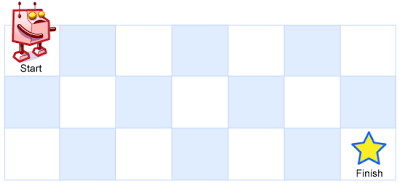


### Example 1:
**Input:**  
```
m = 3, n = 7
```

**Output:**  
```
28
```

---

### Example 2:
**Input:**  
```
m = 3, n = 2
```

**Output:**  
```
3
```

**Explanation:**  
From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right → Down → Down
2. Down → Down → Right
3. Down → Right → Down

---

## Constraints:
- 1 <= m, n <= 100

In [ ]:
# Bottom-up algorithm.
# Combinatorics

In [ ]:
# 0 ms
class Solution(object):
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        grid = [1] * n

        for _ in range(1, m):
            for a in range(1, n):
                grid[a] += grid[a-1]
        
        return grid[-1]

In [ ]:
# 0 ms 
# alternative solution
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[-1] * n for _ in range(m)]

        def solve(i, j):
            if i == m - 1 or j == n - 1:
                return 1
            if dp[i][j] != -1:
                return dp[i][j]
            dp[i][j] = solve(i + 1, j) + solve(i, j + 1)
            return dp[i][j]

        return solve(0, 0)

# 64. Minimum Path Sum

### Difficulty: Medium  

---

## Problem Statement

Given an (m x n) (grid) filled with non-negative numbers, find a path from the top-left corner to the bottom-right corner that minimizes the sum of all numbers along its path.

**Note:** You can only move either **down** or **right** at any point in time.

---

## Examples

### Example 1:

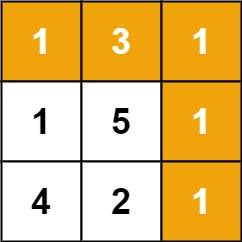

**Input:**
```python
grid = [[1, 3, 1],[1, 5, 1],[4, 2, 1]]
```

**Output:**
```
7
```

**Explanation:**  
The path \(1 → 3 → 1 → 1 → 1\) minimizes the sum.

---

### Example 2:
**Input:**
```python
grid = [[1, 2, 3],[4, 5, 6]]
```

**Output:**
```
12
```

---

## Constraints:
- m == grid.length
- n == grid[i].length
- 1 <= m, n <= 200
- 0 <= grid[i][j] <= 200

In [ ]:
# o ms
class Solution(object):
    def minPathSum(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        m, n = len(grid), len(grid[0])

        for i in range(m):
            for j in range(n):
                if i == 0 and j ==0:
                    continue
                elif i == 0:
                    grid[i][j] += grid[i][j-1]
                elif j == 0:
                    grid[i][j] += grid[i-1][j]
                else:
                    grid[i][j] += min(grid[i-1][j], grid[i][j-1])
                    
        return grid[m-1][n-1]

In [ ]:
class Solution(object):
    def minPathSum(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        if not grid or not grid[0]:
            return 0
        
        m = len(grid)
        n = len(grid[0])
        
        # Create a dp array with the same dimensions as grid
        dp = [[0] * n for _ in range(m)]
        
        # Initialize the starting point
        dp[0][0] = grid[0][0]
        
        # Fill the first row (can only come from the left)
        for j in range(1, n):
            dp[0][j] = dp[0][j - 1] + grid[0][j]
        
        # Fill the first column (can only come from above)
        for i in range(1, m):
            dp[i][0] = dp[i - 1][0] + grid[i][0]
        
        # Fill the rest of the dp array
        for i in range(1, m):
            for j in range(1, n):
                dp[i][j] = min(dp[i - 1][j], dp[i][j - 1]) + grid[i][j]
        
        # The bottom-right corner contains the minimum path sum
        return dp[m - 1][n - 1]

# Example usage:
solver = Solution()
print(solver.minPathSum([[1, 3, 1], [1, 5, 1], [4, 2, 1]]))  # Output: 7
print(solver.minPathSum([[1, 2, 3], [4, 5, 6]]))  # Output: 12